# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male']

In [5]:
income_data[1:10]

['Rich',
 'Rich',
 'Rich',
 'Middle Class',
 'Poor',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Poor']

In [6]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [7]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,163.953799,72.345527,33.560663,20345.887970
1,Female,Rich,184.905681,61.518086,49.561513,21151.176780
2,Male,Rich,131.373154,33.640031,36.178376,18179.731522
3,Male,Rich,186.600610,22.857793,34.856201,19996.088818
4,Female,Middle Class,147.352186,72.159031,31.668587,21393.683736


## Agrupación de datos

In [9]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   4,   5,  10,  11,  13,  15,  17,  22,
             ...
             485, 486, 488, 489, 492, 494, 495, 496, 498, 499],
            dtype='int64', length=240),
 'Male': Int64Index([  2,   3,   6,   7,   8,   9,  12,  14,  16,  18,
             ...
             479, 480, 481, 483, 484, 487, 490, 491, 493, 497],
            dtype='int64', length=260)}

In [11]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female            Rich  163.953799   72.345527  33.560663  20345.887970
1    Female            Rich  184.905681   61.518086  49.561513  21151.176780
4    Female    Middle Class  147.352186   72.159031  31.668587  21393.683736
5    Female            Poor  101.080948   67.259673   7.741274  18419.599606
10   Female            Poor  189.714738   66.723674  32.802338  20922.482334
..      ...             ...         ...         ...        ...           ...
494  Female            Rich  177.361707   90.838397  45.614436  18855.172211
495  Female            Poor  212.159608  105.595272  27.576874  21288.335124
496  Female    Middle Class  130.988916   41.970419   9.748998  21140.926672
498  Female            Rich  171.403866   47.055698  14.305326  20613.452645
499  Female    Middle Class  169.346569   16.186106  16.911226  19811.902817

[240 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [12]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,163.953799,72.345527,33.560663,20345.887970
1,Female,Rich,184.905681,61.518086,49.561513,21151.176780
4,Female,Middle Class,147.352186,72.159031,31.668587,21393.683736
5,Female,Poor,101.080948,67.259673,7.741274,18419.599606
10,Female,Poor,189.714738,66.723674,32.802338,20922.482334
...,...,...,...,...,...,...
494,Female,Rich,177.361707,90.838397,45.614436,18855.172211
495,Female,Poor,212.159608,105.595272,27.576874,21288.335124
496,Female,Middle Class,130.988916,41.970419,9.748998,21140.926672
498,Female,Rich,171.403866,47.055698,14.305326,20613.452645


In [13]:
double_group = data.groupby(["Gender", "Economic Status"])

In [14]:
len(double_group)

6

In [15]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
4    Female    Middle Class  147.352186  72.159031  31.668587  21393.683736
17   Female    Middle Class  157.029639  66.901157  33.758433  18014.688655
23   Female    Middle Class  146.458361  54.669212  31.099700  19672.511505
30   Female    Middle Class  148.742552  44.249030  16.529690  18923.584482
38   Female    Middle Class  224.434334  57.839211  25.798468  21399.408675
..      ...             ...         ...        ...        ...           ...
462  Female    Middle Class  193.602260  65.198280  20.187822  20599.106397
476  Female    Middle Class  183.401562  28.125058  21.380270  19273.481240
486  Female    Middle Class  152.399186  61.551720  39.654178  18667.083135
496  Female    Middle Class  130.988916  41.970419   9.748998  21140.926672
499  Female    Middle Class  169.346569  16.186106  16.911226  19811.902817

[81 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados

In [16]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     13401.203879  4985.343668  2319.851868  1.577405e+06
       Poor             12289.725456  4998.346454  2198.036265  1.539300e+06
       Rich             13126.524776  5004.516883  2282.721464  1.636124e+06
Male   Middle Class     12655.385348  5612.777838  2278.448350  1.622101e+06
       Poor             12661.905266  4945.764317  2322.849718  1.575970e+06
       Rich             15569.126653  6364.429369  2760.193909  1.935677e+06

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     165.446961  61.547453  28.640147  19474.133164
       Poor             159.606824  64.913590  28.545926  19990.913102
       Rich             160.079570  61.030694  27.838067  19952.726575
Male   Middle Class     154.333968  68.448510  27.785955  19781.720878
       Poor             158.273816  61.822054  29.035621  19699.621942
       Rich             158.868639  64.943157  28.165244  19751.805952

In [18]:
double_group.size()

Gender  Economic Status
Female  Middle Class       81
        Poor               77
        Rich               82
Male    Middle Class       82
        Poor               80
        Rich               98
dtype: int64

In [19]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      81.0  165.446961  33.926957   96.411594  146.458361   
       Poor              77.0  159.606824  30.210745   67.941722  145.036900   
       Rich              82.0  160.079570  23.295659  103.977094  140.444834   
Male   Middle Class      82.0  154.333968  28.697827  102.024274  133.515122   
       Poor              80.0  158.273816  26.516043  101.857546  141.686256   
       Rich              98.0  158.868639  28.043309   86.458762  138.794445   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     164.584133  183.401562  269.660272   81.0  61.547453   
       Poor             159.968508  180.310574  238.396391   77.0  64.913590   
       Rich             161.514045  177.630709  216.508127   82.0  61.030694   
Male   Middle Class     151.977535  173.066332  237.063760   82.0  68.448510   
       Poor             157.714275  169.083122  230.405329   80.0  61.822054   
       Rich             157.766519  179.652219  237.800652   98.0  64.943157   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  36.411964  50.810448   81.0  19474.133164   
       Poor             ...  37.050467  49.088036   77.0  19990.913102   
       Rich             ...  34.698692  57.986274   82.0  19952.726575   
Male   Middle Class     ...  36.184261  51.607993   82.0  19781.720878   
       Poor             ...  35.879215  54.830808   80.0  19699.621942   
       Rich             ...  36.253551  64.152284   98.0  19751.805952   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     1052.310088  18014.688655  18478.415008  19336.193341   
       Poor             1004.501328  18092.017074  19159.292572  20178.681307   
       Rich             1081.049073  18029.599759  19015.502521  20272.415454   
Male   Middle Class     1084.895103  18003.694921  18816.345697  19868.321557   
       Poor              978.902189  18002.042773  18893.120337  19754.684461   
       Rich              947.629708  18023.445926  18945.156981  19866.607133   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20382.985604  21399.408675  
       Poor             20866.365568  21480.873418  
       Rich             20800.643475  21498.174595  
Male   Middle Class     20557.134446  21472.269226  
       Poor             20514.043646  21469.776096  
       Rich             20391.630216  21489.350304  

[6 rows x 32 columns]

In [20]:
grouped_income = double_group["Income"]

In [21]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      81.0  19474.133164  1052.310088  18014.688655   
       Poor              77.0  19990.913102  1004.501328  18092.017074   
       Rich              82.0  19952.726575  1081.049073  18029.599759   
Male   Middle Class      82.0  19781.720878  1084.895103  18003.694921   
       Poor              80.0  19699.621942   978.902189  18002.042773   
       Rich              98.0  19751.805952   947.629708  18023.445926   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18478.415008  19336.193341  20382.985604  21399.408675  
       Poor             19159.292572  20178.681307  20866.365568  21480.873418  
       Rich             19015.502521  20272.415454  20800.643475  21498.174595  
Male   Middle Class     18816.345697  19868.321557  20557.134446  21472.269226  
       Poor             18893.120337  19754.684461  20514.043646  21469.776096  
       Rich             18945.156981  19866.607133  20391.630216  21489.350304

In [22]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.577405e+06  28.640147  33.926957
       Poor             1.539300e+06  28.545926  30.210745
       Rich             1.636124e+06  27.838067  23.295659
Male   Middle Class     1.622101e+06  27.785955  28.697827
       Poor             1.575970e+06  29.035621  26.516043
       Rich             1.935677e+06  28.165244  28.043309

In [23]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     28.640147  4.906947
       Poor             28.545926  5.317758
       Rich             27.838067  6.913936
Male   Middle Class     27.785955  5.410992
       Poor             29.035621  6.006643
       Rich             28.165244  5.694244

In [24]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     13401.203879  165.446961  33.926957  4985.343668   
       Poor             12289.725456  159.606824  30.210745  4998.346454   
       Rich             13126.524776  160.079570  23.295659  5004.516883   
Male   Middle Class     12655.385348  154.333968  28.697827  5612.777838   
       Poor             12661.905266  158.273816  26.516043  4945.764317   
       Rich             15569.126653  158.868639  28.043309  6364.429369   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     61.547453  23.504462  2319.851868  28.640147   
       Poor             64.913590  24.199756  2198.036265  28.545926   
       Rich             61.030694  23.221702  2282.721464  27.838067   
Male   Middle Class     68.448510  23.381388  2278.448350  27.785955   
       Poor             61.822054  29.613684  2322.849718  29.035621   
       Rich             64.943157  25.573931  2760.193909  28.165244   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.049394  1.577405e+06  19474.133164  1052.310088  
       Poor             10.471797  1.539300e+06  19990.913102  1004.501328  
       Rich             12.852572  1.636124e+06  19952.726575  1081.049073  
Male   Middle Class     11.537197  1.622101e+06  19781.720878  1084.895103  
       Poor             12.197791  1.575970e+06  19699.621942   978.902189  
       Rich             12.583401  1.935677e+06  19751.805952   947.629708

In [25]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     4.906947  2.634858  2.608160  18.621382
       Poor             5.317758  2.699997  2.743857  20.031833
       Rich             6.913936  2.644348  2.179282  18.570400
Male   Middle Class     5.410992  2.945494  2.423201  18.345972
       Poor             6.006643  2.100789  2.395418  20.251166
       Rich             5.694244  2.552484  2.249793  20.950544

## Filtrado de datos

In [26]:
double_group["Age"].filter(lambda x: x.sum()>2400)

2      36.178376
3      34.856201
12     42.265593
16     32.609153
19     26.265028
         ...    
474     5.770154
483    39.767091
490    23.423237
493    22.211849
497     6.772242
Name: Age, Length: 98, dtype: float64

## Transformación de variables

In [27]:
zscore = lambda x : (x - x.mean())/x.std()

In [28]:
z_group = double_group.transform(zscore)

In [29]:
import matplotlib.pyplot as plt

(array([  6.,   9.,  35.,  62., 101., 125.,  92.,  52.,  15.,   3.]),
 array([-3.1029637 , -2.50667915, -1.91039461, -1.31411006, -0.71782551,
        -0.12154096,  0.47474359,  1.07102814,  1.66731269,  2.26359724,
         2.85988179]),
 <a list of 10 Patch objects>)

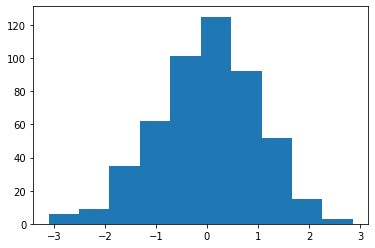

In [30]:
plt.hist(z_group["Age"])

In [31]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [32]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,163.953799,72.345527,33.560663,20345.887970
1,184.905681,61.518086,49.561513,21151.176780
2,131.373154,33.640031,36.178376,18179.731522
3,186.600610,22.857793,34.856201,19996.088818
4,147.352186,72.159031,31.668587,21393.683736
...,...,...,...,...
495,212.159608,105.595272,27.576874,21288.335124
496,130.988916,41.970419,9.748998,21140.926672
497,181.351180,94.947390,6.772242,19355.756667
498,171.403866,47.055698,14.305326,20613.452645


## Operaciones diversas muy útiles

In [33]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,163.953799,72.345527,33.560663,20345.887970
2,Male,Rich,131.373154,33.640031,36.178376,18179.731522
4,Female,Middle Class,147.352186,72.159031,31.668587,21393.683736
5,Female,Poor,101.080948,67.259673,7.741274,18419.599606
6,Male,Poor,136.109683,77.196975,25.077568,18350.015642
7,Male,Middle Class,177.658262,41.962767,23.520153,19861.409107


In [34]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
487,Male,Middle Class,141.260616,80.566603,2.824867,18879.573522
491,Male,Poor,151.721631,64.087404,47.103282,21399.713274
495,Female,Poor,212.159608,105.595272,27.576874,21288.335124
497,Male,Rich,181.351180,94.947390,6.772242,19355.756667
498,Female,Rich,171.403866,47.055698,14.305326,20613.452645
499,Female,Middle Class,169.346569,16.186106,16.911226,19811.902817


In [35]:
double_group.nth(32)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     195.728945   28.568298  36.698363  19097.458903
       Poor             127.097412   50.944304  37.050467  19867.636072
       Rich             188.476901   62.612174  40.222843  20538.458433
Male   Middle Class     141.399871   76.702548  16.682918  21472.269226
       Poor             157.371742  117.387338  27.273002  19462.975966
       Rich             179.932727  122.772727  12.849368  20010.791349

In [36]:
double_group.nth(82)

,,Height,Weight,Age,Income
Gender,Economic Status,,,,
Male,Rich,158.987308,73.483953,14.777023,18349.779623


In [37]:
data_sorted = data.sort_values(["Age", "Income"])

In [38]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
50,Male,Poor,170.506956,58.751668,-8.813680,18350.499202
166,Female,Rich,178.675189,55.391110,-8.262051,19379.957437
196,Female,Rich,165.776040,49.820234,-8.143695,19481.258695
218,Male,Middle Class,148.294187,108.676879,-4.868355,18512.654977
287,Female,Rich,174.088256,119.578760,-3.123607,20778.586398
438,Male,Rich,125.079016,65.075426,-1.928309,19843.709687
118,Male,Middle Class,151.266016,83.399926,-1.140255,19855.231358
228,Male,Poor,174.912347,55.572334,-0.838794,18249.436816
100,Male,Rich,176.514483,25.532820,-0.579912,19569.098402
244,Female,Middle Class,123.180719,93.936921,0.188118,21237.737088


In [39]:
age_grouped = data_sorted.groupby("Gender")

In [40]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
50,Male,Poor,170.506956,58.751668,-8.813680,18350.499202
166,Female,Rich,178.675189,55.391110,-8.262051,19379.957437


In [41]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
237,Female,Rich,140.161358,35.074289,57.986274,20829.789566
375,Male,Rich,139.505745,68.870061,64.152284,20615.944289


# Conjunto de entrenamiento y conjunto de testing

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [44]:
len(data)

3333

## Dividir utilizando la distribución normal

In [45]:
a = np.random.randn(len(data))

(array([ 12.,  33., 156., 437., 792., 881., 633., 298.,  74.,  17.]),
 array([-3.52682463, -2.85137967, -2.1759347 , -1.50048974, -0.82504478,
        -0.14959982,  0.52584514,  1.2012901 ,  1.87673507,  2.55218003,
         3.22762499]),
 <a list of 10 Patch objects>)

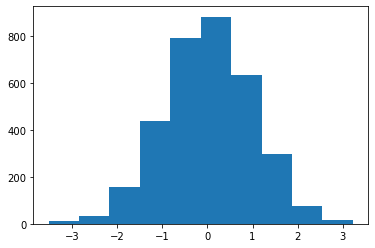

In [46]:
plt.hist(a)

In [47]:
check = (a<0.75)

In [48]:
check = check.astype(np.uint8) # antes estaba check #### Novedad#### 

(array([ 780.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2553.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

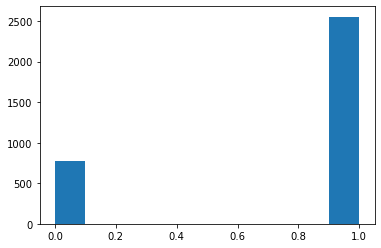

In [49]:
plt.hist(check)

In [50]:
check = (a<0.75)
training = data[check]
testing = data[~check]

In [51]:
len(training)

2553

In [52]:
len(testing)

780

## Con la libreria sklearn

In [53]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [54]:
train, test = train_test_split(data, test_size = 0.2)

In [55]:
len(train)

2666

In [56]:
len(test)

667

## Usando una función de shuffle

In [57]:
import numpy as np

In [58]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [59]:
import sklearn

In [60]:
data = sklearn.utils.shuffle(data)

In [61]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [62]:
len(train_data)

2499

In [63]:
len(test_data)

833